In [1]:
using Plots, NLSolvers # define packages

In [29]:


v = 0.08;
const L = 0.05;    # Total length (m)
T = v/L;
dt = 0.05;
const N = 400; 
du = L/N;
v2 = du/dt;
# V is a function of x and t (matrix, x on the rows and t on the columns)
# v = # propagation velocity
# h = # impulse response function
# S = sigmoid(V,c,Vr) # wave-pulse conversion function


# r = # excitatory to inhibitory range ratio
# Ie = connectivity_function(x,1)
# Ii = connectivity_function(x,r)



function integral_function(V_Value,eta,du)
    l = length(Vrow);
    a = 1/((eta^2)*du);
    b = (1/eta)*(G(0.,c,Vr)+(G(du,c,Vr)-G(0.,c,Vr))/(eta*du));
    K = correction_function(L,eta,du);
    cc = zeros(1,l-2)
    for i = 1:l-2
        cc[i] = exp.(-eta.*Vrow[i+1]).*(sigmoid(Vrow[i+2],c,Vr)-2 .*sigmoid(Vrow[i+1],c,Vr).+sigmoid(Vrow[i],c,Vr));
    end
    summ = sum(cc)
    return a.*b.*summ - K
end
function J(ae,ai,r)
        return ae.*integral_function(Vrow,1,du) .- ai.*integral_function(Vrow,r,du)

LoadError: cannot declare Main.c constant; it already has a value

In [8]:
## Turing Patterns ##

Vrow = range(1,6,length=N+1);
J = ae.*integral_function(Vrow,1,du) .- ai.*integral_function(Vrow,r,du)
display(J)

function connectivity_function(x,eta)  # if excitatory: eta = 1, a = ae
    return eta.*exp.(-x.*eta)         # if inhibitory: eta = r, a = ai
end

-2280.135633570372

In [14]:
## Waves ##
re = 0.001;       # excitatory range (m)
v = 0.16;         # propagation velocity (m/s)

In [15]:
## Homogeneous external stimuli
muP0 = 2.5;       # external stimulus (constant)
r = 2.8;          # ratio
ri = re/r;        # inhibitory range (m)
ai = 40.;         # excitatory strenght
ae = 41.;         # inhibitory strenght

In [16]:
## Inhimogeneous external stimulation
muP0 = 2.5;
function muP(x,t)
    return
end
ri = 0.0001;
re = 0.001;
r = re/ri;
ai = 100.;
ae = 101.;

LoadError: cannot define function muP; it already has a value

In [19]:

V[1,:] = Vrow;
epsilon = dt;
for i = 1:length(t)-1
    V[i+1,:] = V[i,:] .+ epsilon.*phi[i+1]
    phi[i+1,:] = phi[i] .+ epsilon.*(-2 .*phi[i] .- V[i,:] .+ J .+ muP0)
end

display(V)

201×401 Matrix{Float64}:
    1.0       1.0125     1.025     1.0375  …     5.975     5.9875     6.0
 -227.064  -227.065   -227.066  -227.067      -227.561  -227.562   -227.564
 -386.708  -386.708   -386.708  -386.708      -386.658  -386.658   -386.658
 -498.459  -498.459   -498.459  -498.459      -498.464  -498.464   -498.464
 -576.685  -576.685   -576.685  -576.685      -576.685  -576.685   -576.685
 -631.443  -631.443   -631.443  -631.443   …  -631.443  -631.443   -631.443
 -669.774  -669.774   -669.774  -669.774      -669.774  -669.774   -669.774
 -696.605  -696.605   -696.605  -696.605      -696.605  -696.605   -696.605
 -715.387  -715.387   -715.387  -715.387      -715.387  -715.387   -715.387
 -728.535  -728.535   -728.535  -728.535      -728.535  -728.535   -728.535
 -737.738  -737.738   -737.738  -737.738   …  -737.738  -737.738   -737.738
 -744.18   -744.18    -744.18   -744.18       -744.18   -744.18    -744.18
 -748.69   -748.69    -748.69   -748.69       -748.69   -748.69   

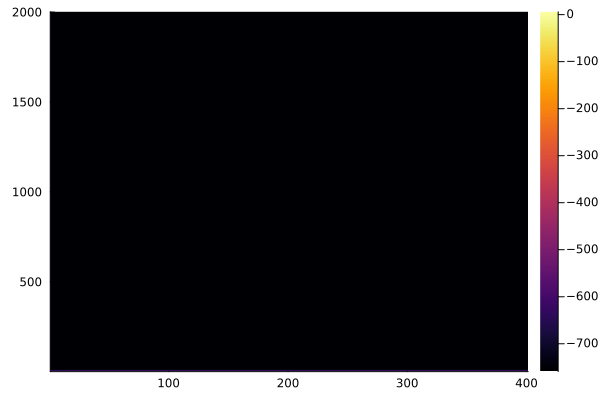

In [14]:
heatmap(V)

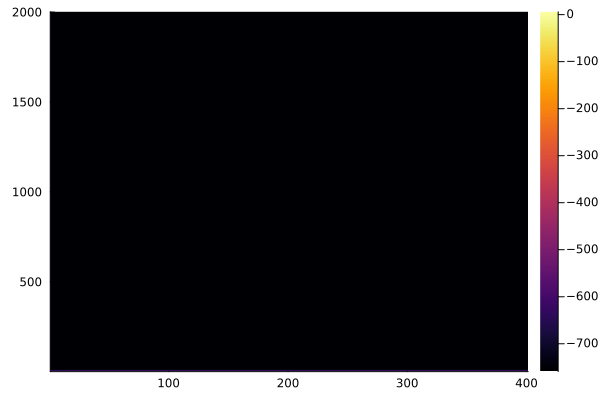

In [15]:
heatmap(phi)

In [17]:
# try - Turing Patterns
const V0 = 3. # the value has to be taken from the figure 1
const N = 400 # number of x points
const L_real = 0.05 # total length also non-dimensional point (l/re)
const c = 1.82;
const Vr = 3;
const v_real = 0.16;# propagation velocity (m/s)
#make normalization with re and alpha
ae = 6.;     # excitatory strenght
ai = 5.;     # inhibitory strenght
re = 0.0005;    # excitatory range (m)
const L = L_real / re
const v = v_real / (re * sqrt(400*400))
ri = 0.001;     # inhibitory range (m)
r = re/ri;   # ratio
du = L/N;
x = 0:du:L;
dt = 0.05;   # time step

muP0 = 2.5;   # external stimulus (constant)

t = 0:dt:100.   # not sure
N_t = length(t);
V = zeros(N_t,(N+1)); # this are the true dimensions of the V matrix
I = V;
phi = zeros(N_t,(N+1));
J = V;

V[1,:] = V0.*ones(1,N+1) .+ 0.005 .*randn(1,N+1);
# VV = V;
# V_0 = V0.*ones(N_0,N+1); #part of the V matrix relative
# V = [V_0;V]; # the temporal (y) index of V within we have to work are from N_0+1 to end (end=N_t+N_0)

function sigmoid(V_pw) # return either a value or a vector or a matrix depending on what V is
    return 1 / (1 + exp(-c * (V_pw-Vr)))
end
    
function G(V,nx,nt,n) # here V should be the whole V matrix
    timedelayed = nt * dt - (n * du / v)
    ntdelayed = Int64(round(timedelayed / dt))
    # display("printout of ntdelayed \n")
    # display(ntdelayed)
    if ntdelayed < 1
        return sigmoid(V0) .+ sigmoid(V0)
    else
        if nx - n < 1
            G1 = sigmoid(V[ntdelayed,N+1-abs(nx-n)]) 
        else 
            G1 = sigmoid(V[ntdelayed,nx-n])
        end
        if nx + n > N+1
            G2 = sigmoid(V[ntdelayed,nx+n-(N+1)]) 
        else
            G2 = sigmoid(V[ntdelayed,nx+n])
        end
        return G1.+G2
        end
    # println("G(nx=$nx, nt=$nt, n=$n): G=$G")
    return G
end
    
function correction_function(V,nx,nt,eta,du)    # ask how should we replace Taylor expansion in of sigmoid function
    return (1/eta).*exp.(-eta.*L).*(G(V,nx,nt,N).+(G(V,nx,nt,N).-G(V,nx,nt,N-1))./(eta.*du))
end

function integral_function(V,nx,nt,eta,du)
    a = 1 ./((eta.^2).*du);
    # display(G(V,nx,nt,0))
    b = (1 ./eta).*(G(V,nx,nt,0).+(G(V,nx,nt,1).-G(V,nx,nt,0))./(eta.*du));
    # print("b = $b\n")
    K = correction_function(V,nx,nt,eta,du)
    # print("K = $K\n")
    cc = zeros(1,N-1)
    for nn = 1:N-1
        # println("nn=$nn, G(nn+2)=$(G(V, nx, nt, nn+2)), G(nn+1)=$(G(V, nx, nt, nn+1)), G(nn)=$(G(V, nx, nt, nn))")
        diff = G(V, nx, nt, nn+2) - 2 * G(V, nx, nt, nn+1) + G(V, nx, nt, nn)
        # println("nn=$nn, Difference=$diff")
        cc[nn] = exp.(-eta.*((nn+1).*du)).*(G(V,nx,nt,nn+2).-2 .*G(V,nx,nt,nn+1).+G(V,nx,nt,nn));
        # cc[nn] = exp.(-eta.*((nn).*du)).*(G(V,nx,nt,nn+1).-2 .*G(V,nx,nt,nn).+G(V,nx,nt,nn-1));
    end 
    summ = sum(cc)
    return a.*summ + b - K
end

function J_function(V,nx,nt,eta,eta_2, du,ae,ai,r)
    return 0.5*(ae.*integral_function(V,nx,nt,eta_1,du) .- ai.*r.*integral_function(V,nx,nt,eta_2,du))
end


display(V) # V[N_0+1:end,:])

2001×401 Matrix{Float64}:
 3.00787  2.99882  3.01246  3.00015  …  2.9928  3.00352  3.00024  3.00165
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 ⋮                                   ⋱                      

In [18]:
eta_1 = 1.0
eta_2 = r
display(V)
for nt = 1:2
    for nx = 1:N+1
        # display(V[nt,nx])
        J[nt,nx] = J_function(V,nx,nt,eta_1,eta_2,du,ae,ai,r);
        display(J[nt,nx])
    end
    V[nt+1,:] = V[nt,:] .+ dt.*phi[nt,:]
    phi[nt+1,:] = phi[nt,:] .+ dt.*(-2 .*phi[nt,:] .- V[nt,:] .+ J[nt,:] .+ muP0)
end
display(V)

2001×401 Matrix{Float64}:
 3.00787  2.99882  3.01246  3.00015  …  2.9928  3.00352  3.00024  3.00165
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0     0.0      0.0      0.0
 ⋮                                   ⋱                      

0.5608848444586938

0.49086142469483685

0.5963971873845346

0.501171402544422

0.4832649530427875

0.3881820033208392

0.5174408841876015

0.5373400316886703

0.5175707676014718

0.5577865896502323

0.5575865653433518

0.5022625444167375

0.5330618783068881

0.5188953118572228

0.48134244471692966

0.5291224591884354

0.5356234174141115

0.47823893383131955

0.535775275958057

0.42779915322668893

0.5929262134622477

0.475484521962505

0.5258241860734105

0.4980118351871097

0.4630124664672972

0.4662831362359281

0.5019490996768963

0.4739063807835948

0.47334428084284275

0.5349955353645428

0.5421100976097484

0.5239194523684962

0.548427404914487

0.49642110234467784

0.5311745257002474

0.4653696394622733

0.5457671953806478

0.4644661035922417

0.5021444183946802

0.5279084201184969

0.5540399777519922

0.4609763601402772

0.5081481595460717

0.5450331887743487

0.48586795169718044

0.5328984185326968

0.5252099903944925

0.4799255755454088

0.49848045800876717

0.5038699300270166

0.5650143196062389

0.4910791466067912

0.5368029817473832

0.46710218932320835

0.5174363043702082

0.49766153314715655

0.5003048518025968

0.5546229753040248

0.43877586304083804

0.537770567671918

0.5289391406573274

0.4878833070232691

0.5102942466529381

0.5032399259104419

0.5306343492674785

0.44487790158179585

0.4658452271247273

0.5490550557168747

0.5124389155625431

0.478120647419237

0.42570752935963396

0.5127711798131687

0.5030503822322356

0.5117462400103014

0.5155244617397421

0.4986901009847964

0.4181524724514616

0.5499812087721607

0.5592649124063098

0.5239968929179493

0.4736804645691861

0.45522396448963853

0.5037801515298632

0.4396743049485359

0.46567627715903814

0.5171982604175462

0.4380963892383072

0.45497176267013195

0.4833292800657776

0.5158484207567695

0.5004510339601382

0.47421549046423017

0.47007252637838226

0.49388444145706734

0.4637119612392637

0.5583861313282519

0.45571286290968693

0.4750926859037987

0.5135178719630664

0.5154246619698277

0.4432374982652769

0.531892878595404

0.4740458414482238

0.5131419020786123

0.4908670042979062

0.5462840972763332

0.49324648447266206

0.4620635055451263

0.5234670976166411

0.5053994901976102

0.47570056337740496

0.506183734963741

0.4189930533610946

0.553971515967338

0.5086216794313372

0.480644106509887

0.5418929098404774

0.5101785261323539

0.5373264497436354

0.5610303484694228

0.4597834464414077

0.5291869868818564

0.5799684085932264

0.5548662523923427

0.49326442016461236

0.5259259614193788

0.5236979674712052

0.5303077570297048

0.4940372607470924

0.5446345269742423

0.44040682913392315

0.5486259350935545

0.49176513834014823

0.5215010392428532

0.42677903151632224

0.5192573662608115

0.5189075098124087

0.4647269846183111

0.40065968698545706

0.4959644145798081

0.4773069483179322

0.4904648445795594

0.47064357951444924

0.5334101789106795

0.6034415268693882

0.496460382100155

0.4445760836231085

0.48491518687815516

0.44968583580955723

0.5042268740776081

0.5218302371786172

0.40007912519601163

0.4237145898918131

0.47475864159779846

0.48289419159334557

0.53559425827242

0.527042759814413

0.5548944771005684

0.43995366765862665

0.4890482824091915

0.49406276291547924

0.4594901635687232

0.4383453807187734

0.547233400865649

0.4822501457297004

0.5042278185074816

0.5462236809367274

0.4925856429772306

0.4973974475259495

0.49215547833666573

0.46503298468033805

0.5268826712811006

0.438053523857326

0.4913201968750269

0.5569397158065539

0.45405533444581314

0.4739628265271638

0.5380587841836575

0.48895186098629706

0.505780199341316

0.5522496000214288

0.49993901665211427

0.40912691472589424

0.5374259482024448

0.5188856435822324

0.4944324168961449

0.5569200321884753

0.5042639246330682

0.45098831647634485

0.5316771085137839

0.4424791622925257

0.5020028613583869

0.4683107790189398

0.5475049757654791

0.49996144357789785

0.5079971990611267

0.5151419963586554

0.5508655236437616

0.44912620164130335

0.48747601911142446

0.41877310932942624

0.4829418044804177

0.5321458270567638

0.5111175826131928

0.5210562605378004

0.47172782401520497

0.4366411965301613

0.4716580338606442

0.46397640057288125

0.5753820081253962

0.44842648844254374

0.4697936369398472

0.49648847588383704

0.5785111769898048

0.45560156861529233

0.5049239444197093

0.46292356948711433

0.46326693385498663

0.5820039781188222

0.5014952060188405

0.4619574906299544

0.4487920821025506

0.5063792959590585

0.4719120821409746

0.4751192871634462

0.48738920038799405

0.4811463473686386

0.5112581141250989

0.42460640439262853

0.5071843516096983

0.4956271287006593

0.5312561197794019

0.49903057341757906

0.4600696161245508

0.5249573145155115

0.4963259533694977

0.506181229286895

0.4855909061449726

0.4994775941752394

0.49421678976370575

0.46000286452791705

0.5472079682828754

0.4317669038854923

0.4644301174026517

0.47218340385932356

0.5481961576947794

0.5314174995749781

0.5408640832817291

0.4825724490157124

0.49113463477339847

0.5348632867014476

0.5584940462920236

0.5253999744431863

0.5509354238479927

0.5021095645145968

0.5028428391775526

0.4628464688875975

0.5256717783069296

0.5503692986693864

0.48580501962755385

0.41628962232536004

0.5159700456918732

0.4484739585071771

0.4520546594439496

0.45757405903418125

0.48175854426308184

0.5327403867430114

0.555229073288928

0.5102666951328549

0.5283916415473642

0.4777228005926828

0.5321909099639188

0.5276295727949392

0.5241849062435753

0.5584653690466799

0.5061913122077617

0.5535386776628286

0.5358378953011198

0.5245383241894901

0.5195283897874274

0.44526226103974365

0.491296638556479

0.5017357110998009

0.49256178850566323

0.5969756702326188

0.514659492031543

0.5346705761311688

0.5129808548205088

0.4552001186627863

0.5476177953856998

0.4992624417134377

0.4960322356390967

0.5102986218369989

0.5661977155871449

0.4737647625891164

0.4797088488442425

0.4209080639226377

0.4667273013730262

0.4531134536715844

0.4745243110180781

0.5148132969283354

0.5033253327860905

0.5058297219208638

0.5406697114123515

0.5336646491906123

0.48225074705778503

0.4740045542572706

0.48240959842032183

0.49731547354332273

0.49519811919499324

0.5354458076993436

0.48325371675607887

0.5072072857020049

0.5626556094797253

0.47915525373058276

0.5392270422646366

0.5129487492622999

0.4334392880442901

0.5534842167773575

0.49812228744609355

0.4210146489087738

0.49219155899591804

0.4542006961210667

0.5259257805303421

0.5183325356754587

0.5182848108465978

0.5076084345289487

0.5493156516953026

0.4672746166666695

0.4866350729393525

0.4842865289168121

0.46699007010608184

0.5153639420899014

0.4320408862815359

0.553964893190916

0.49054501917197646

0.5259948358864861

0.500845142130959

0.5269617108410869

0.45645736961894423

0.48269064219112945

0.5228458011846353

0.4366737163431602

0.5183879378950516

0.4725448845846514

0.4958453419664899

0.52346154848563

0.5087483072620937

0.46705306833455085

0.4852827809611995

0.48036864637415677

0.47869539960326835

0.5203322173548774

0.45632323512107487

0.49301237649677

0.489086584849483

0.5257144664648052

0.5124967598469028

0.510647700849975

0.5099788821740061

0.4861140957995578

0.5019480730385957

0.46220590859519994

0.4733680831638174

0.4670702575804486

0.5287244183325615

0.505622970265732

0.49837775260284545

0.4990765169425875

0.583404621280923

0.5241544820586284

0.5075985796267668

0.46426452040380006

0.49150747624421065

0.5132602341806662

0.4405874900415898

0.5172583112220295

0.4769809669791507

0.5322753421996347

0.5309983420676483

0.4448688636809215

0.44332007208438196

0.5046487268420203

0.5477897841729225

0.5121741829578603

0.5218082178808867

0.5351458284125212

0.46190490579853805

0.4991226033494245

0.48818035782254254

0.49163024047418613

0.5386822997701759

0.5013505871501782

0.530761363567068

0.4517693351889531

0.5695620713587224

0.5108620530342418

0.4442738015932144

0.5272558026156093

0.5018519725311283

0.512787601290905

-7.801648109264029

-7.8251379899458495

-7.788569481484501

-7.821860580876008

-7.827514562636026

-7.854689122617581

-7.816564688001632

-7.80987520728366

-7.816521789056738

-7.8027504920994755

-7.8028214538520615

-7.821510184179797

-7.811333450854226

-7.816083740883126

-7.828110936946501

-7.812666451003913

-7.810461663153246

-7.829069361937368

-7.810409855122748

-7.843924515262383

-7.789884458510482

-7.829915546479233

-7.813775337336164

-7.82287137370751

-7.833695486031695

-7.8327123569597195

-7.821610909952431

-7.830398498282557

-7.8305701872549704

-7.810675722723737

-7.80823614946368

-7.814412753519125

-7.806043921322795

-7.82337812300627

-7.811973249659589

-7.832987522203439

-7.8069700689579555

-7.833259246179429

-7.8215481506976126

-7.81307537080516

-7.804075479892202

-7.834304626849665

-7.819608353868782

-7.807224841750781

-7.826703831173699

-7.811388947567622

-7.813981113118917

-7.828549152007499

-7.822721813473585

-7.820992764414541

-7.800169340219071

-7.825069399601222

-7.810058875030801

-7.832465258610586

-7.81656620047969

-7.822983090500763

-7.822138370023522

-7.803869882441591

-7.84080463816985

-7.809727839850449

-7.812728254087276

-7.826073538054205

-7.818909908399062

-7.821195740253568

-7.812155970332185

-7.83904363940259

-7.83284432074467

-7.805824766083756

-7.818209252103355

-7.829105786264071

-7.844512103129908

-7.81810046281843

-7.821256763198795

-7.818435839621856

-7.817196507598695

-7.822654865802548

-7.846616303453221

-7.805500936438369

-7.802225250838077

-7.814386880288369

-7.8304675232898795

-7.8360136559487135

-7.821021703331535

-7.840546558270605

-7.832895206211397

-7.816644797170117

-7.84099954405476

-7.836088184021204

-7.827494572615693

-7.817089853902788

-7.822091538653002

-7.830304009795418

-7.831566108843173

-7.824183244168488

-7.833485707275214

-7.802537644078583

-7.8358690861570945

-7.830035585286556

-7.817855747361566

-7.8172293512551825

-7.839518933904204

-7.811729986530285

-7.8303558744686725

-7.817979005676394

-7.8251362324996805

-7.806790453242666

-7.824385155747892

-7.833979661541548

-7.814563815994022

-7.820499018938786

-7.829849326397808

-7.820245340693514

-7.84638359073384

-7.8040996093556725

-7.819454475998105

-7.82832706020104

-7.808311080686249

-7.818947637861662

-7.809879854388075

-7.801596188410407

-7.834660483324498

-7.812644691664538

-7.794722548576443

-7.803784026332231

-7.824379482288256

-7.813741217508248

-7.814486732917954

-7.812266358599819

-7.824134843200891

-7.8073630774442275

-7.840335832033533

-7.80597462749337

-7.824853113030654

-7.815218963531738

-7.844211366503975

-7.8159638237369595

-7.816079702019376

-7.833180835355671

-7.851380626241218

-7.823523341798303

-7.829356143196517

-7.825262858764585

-7.831392698807967

-7.8112151444201015

-7.785875706127825

-7.8233656272039696

-7.839131193422899

-7.827001016509318

-7.837642530370477

-7.820877662399395

-7.815109425035461

-7.851536207190728

-7.845069928926861

-7.830137853390919

-7.827629734368559

-7.810471609478158

-7.813366408407489

-7.803774063007721

-7.840466226133424

-7.825708163145803

-7.824126764863461

-7.834747856183206

-7.840928148733219

-7.806460153946841

-7.827829617070641

-7.820877357756572

-7.8068114555451515

-7.824594068257328

-7.82306726543646

-7.824729924487471

-7.833088816955696

-7.813420181536184

-7.841011831985778

-7.824993428915889

-7.803050761174161

-7.836358715138093

-7.830381247864668

-7.809629123608218

-7.825738432912724

-7.820375915902053

-7.804705536329358

-7.822255516658572

-7.849093098982912

-7.809845808081022

-7.816086942082389

-7.8240096281019405

-7.803057734857827

-7.8208657106927575

-7.837260891747551

-7.811803087623103

-7.839738185919687

-7.821593637580349

-7.832099981660978

-7.806365559939387

-7.822248337372713

-7.819657383616214

-7.817322343565481

-7.805191237366321

-7.837806235888127

-7.826201098130785

-7.846444515460982

-7.8276149483680495

-7.811644253963815

-7.818641243719123

-7.815366858851252

-7.831062962941923

-7.841416168719469

-7.831084206438991

-7.833406333587675

-7.796408483448069

-7.838010687699921

-7.831650734199913

-7.823356689382468

-7.7952597080464585

-7.835902007546833

-7.82065267034546

-7.833722127523146

-7.833619201461184

-7.793969873135472

-7.821756669445076

-7.834011378859135

-7.837903895384205

-7.820182027700753

-7.831006863710895

-7.83002743865624

-7.826228277248585

-7.82817165276699

-7.818595347176011

-7.84482055467787

-7.819921158009411

-7.8236305170044975

-7.811945634282607

-7.822546085568497

-7.834575185487955

-7.814065702564296

-7.823408388479008

-7.82024615176482

-7.826790298973197

-7.8224031631173325

-7.824077965877878

-7.834595085854488

-7.806469010194492

-7.842803826667648

-7.833270059382519

-7.830924223524303

-7.806124603679118

-7.811891003755159

-7.808665639547309

-7.827729617403666

-7.825051914547485

-7.810720778879521

-7.802499308238392

-7.8139174862365905

-7.805166736589728

-7.82155935144829

-7.82132355734975

-7.8337452303413375

-7.813826419947434

-7.805365082055038

-7.826723476449462

-7.847130784670682

-7.817049796686726

-7.837996825318784

-7.836947782302772

-7.835317565131312

-7.827982033523849

-7.81144258606354

-7.8036559124192255

-7.818918891988744

-7.812912715165883

-7.829228240186463

-7.811628969828728

-7.813169169081885

-7.814324049358415

-7.802509496294682

-7.82024288796684

-7.804252095925122

-7.810388487843284

-7.814205886017069

-7.815874006597397

-7.838932072689525

-7.825000855120258

-7.821679450401742

-7.824601604795523

-7.788349534874849

-7.817480971394254

-7.810786414986655

-7.818031778314772

-7.836020704056935

-7.8063262495738694

-7.8224719663428814

-7.823501783349499

-7.818908481763586

-7.79974356037083

-7.830441770660469

-7.82861608454318

-7.845852117642831

-7.832578402557157

-7.8366362991347

-7.830209557651088

-7.817430421389144

-7.821168237063459

-7.82035989654257

-7.808732552007685

-7.811128662737497

-7.8278294305526455

-7.830368494311202

-7.827780151546875

-7.8230933858561755

-7.823766745049753

-7.81052223868895

-7.827518054146406

-7.819913720979306

-7.801015325566102

-7.828786936052779

-7.809228467898329

-7.818042296988761

-7.842329078018864

-7.804271273886783

-7.822836134292475

-7.84582248363397

-7.8247185333584355

-7.836315833656686

-7.813741278156149

-7.816269986292385

-7.81628577178617

-7.819783587941394

-7.805733702553162

-7.832413193353965

-7.8264641844421465

-7.827196830530285

-7.832499104949061

-7.8172493310392515

-7.842726146926891

-7.804101943407812

-7.825237621786762

-7.813718124077278

-7.821965220140189

-7.8133936343641075

-7.835648689200617

-7.8276929317065775

-7.814771097831162

-7.841406870053817

-7.816251659737489

-7.830814060210281

-7.823561185403026

-7.814565668353993

-7.819413304255622

-7.832480087995641

-7.826886416783786

-7.82841223622253

-7.828928728859893

-7.815607363256632

-7.835688418782659

-7.824459192693659

-7.825696137341371

-7.813812113526739

-7.818190317473537

-7.8187946201984975

-7.819012711401852

-7.826626972088427

-7.821611239771233

-7.833937048254882

-7.8305629205144385

-7.8324748987946045

-7.812800618848275

-7.820426766348255

-7.8227546024297325

-7.822531401653265

-7.793450386594179

-7.814334218041841

-7.819786785994825

-7.833319809356123

-7.824934382416439

-7.817940220470657

-7.840283818671825

-7.816624972904581

-7.82945633844497

-7.811600342073547

-7.812032865033192

-7.839046261882094

-7.839495042023502

-7.820741535177298

-7.806266307387814

-7.818295884243673

-7.815116753818893

-7.810624506103959

-7.834027108851444

-7.82251667086401

-7.825980445137727

-7.8248956659183015

-7.809415391710743

-7.821803086342323

-7.812113022130937

-7.837031620250494

-7.79852817948178

-7.818724668342046

-7.8392188347849885

-7.813294824373015

-7.82164211044047

-7.818095084461879

2001×401 Matrix{Float64}:
  0.560885   0.490861   0.596397  …   0.527256   0.501852   0.512788
 -7.80165   -7.82514   -7.78857      -7.81329   -7.82164   -7.8181
 -7.7954    -7.81889   -7.78232      -7.80704   -7.81539   -7.81185
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  ⋮                               ⋱                         ⋮
  0.0        0.0        0.0           0.0        0.0        0.0
  0.

In [19]:
display(V)

2001×401 Matrix{Float64}:
  0.560885   0.490861   0.596397  …   0.527256   0.501852   0.512788
 -7.80165   -7.82514   -7.78857      -7.81329   -7.82164   -7.8181
 -7.7954    -7.81889   -7.78232      -7.80704   -7.81539   -7.81185
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  ⋮                               ⋱                         ⋮
  0.0        0.0        0.0           0.0        0.0        0.0
  0.

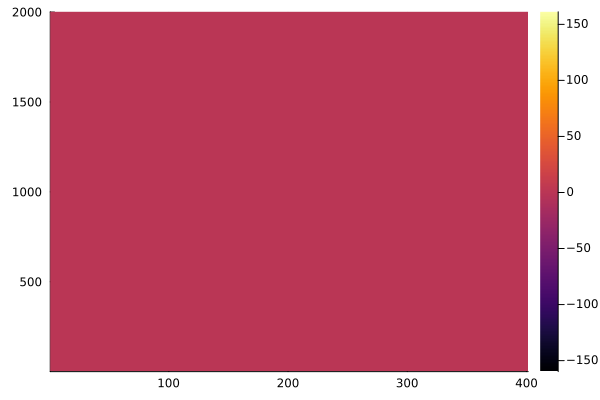

In [27]:
heatmap(V)